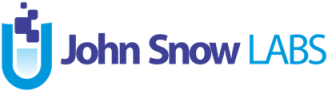

# 🚀 JohnSnowLabs Medical LLM Integration with LlamaIndex Library

This notebook demonstrates how to integrate medical Large Language Models (LLMs) with the LlamaIndex library.

You can pull the image from 👉 [Docker Hub](https://hub.docker.com/r/johnsnowlabs/jsl-llms):

```bash
docker pull johnsnowlabs/jsl-llms:latest
```

---

### 🐳 Run the Container

Make sure to set your license key:

```bash
export SPARK_NLP_LICENSE=your_license_key_here
```

Then run the container with:

```bash
docker run -d \
    --gpus all \
    --env "SPARK_NLP_LICENSE=$SPARK_NLP_LICENSE" \
    -p 8080:8080 \
    --ipc=host \
    johnsnowlabs/jsl-llms \
    --model Medical-Reasoning-LLM-14B \
    --port 8080 \
    --tensor-parallel-size 4
```

---

### 📜 View Container Logs

You can monitor the container logs with:

```bash
docker logs <container-id>
```

The logs will show important information such as:
- Model initialization and loading progress
- License validation status
- Server startup confirmation
- Memory usage and GPU configuration
- Model task capabilities
- Available API endpoints and routes
- Health check status


Example log entry for successful startup:
```bash
INFO: Application startup complete.
llm-service [INFO] Server is healthy and model is loaded
INFO: Started server process [1]
```

Once you see these messages, the service is ready to accept requests! 🎉

## Install Required Packages

In [ ]:
!pip install llama-index llama-index-llms-openai-like

## Imports

In [2]:
import requests
from llama_index.llms.openai_like import OpenAILike
from llama_index.core.base.llms.types import ChatMessage

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Initialize  Client

In [13]:
base_url = "http://localhost:8080/v1"
openai_api_key = "no-key-required"
model_name = "Medical-Reasoning-LLM-14B"

In [15]:
llm = OpenAILike(
    model=model_name,
    api_base=base_url,
    api_key=openai_api_key,
    context_window=32768,
    is_chat_model=True,
    max_tokens=4096,
    temperature=0.8,
    top_p= 0.95,
)

## Health Check

In [16]:
url = "http://localhost:8080/health"
response = requests.get(url)
print("Health:", response.status_code, response.text)

Health: 200 


In [17]:
url = "http://localhost:8080/v1/models"
response = requests.get(url)
print("Models:", response.json())

Models: {'object': 'list', 'data': [{'id': 'Medical-Reasoning-LLM-14B', 'object': 'model', 'created': 1744049403, 'owned_by': 'vllm', 'root': 'Medical-Reasoning-LLM-14B', 'parent': None, 'max_model_len': 32768, 'permission': [{'id': 'modelperm-28369c3f6c674577aa690e3002ffe5dd', 'object': 'model_permission', 'created': 1744049403, 'allow_create_engine': False, 'allow_sampling': True, 'allow_logprobs': True, 'allow_search_indices': False, 'allow_view': True, 'allow_fine_tuning': False, 'organization': '*', 'group': None, 'is_blocking': False}]}]}


## Initial setup

In [18]:
prompt1 = "How can I maintain good kidney health?"

prompt2 = """Patients with xeroderma pigmentosum develop skin cancer when they are exposed to sunlight because they have a deficiency in:

A. An enzyme essential to repair mismatched bases.
B. UV specific endonuclease.
C. DNA polymerase I.
D. DNA polymerase III.
E. Glycosylase that removes uracil bases from DNA."""

system_prompt = """You are a medical expert that reviews the problem, does reasoning, and then gives a final answer.
Strictly follow this exact format for giving your output:

<think>
reasoning steps
</think>

**Final Answer**: [Conclusive Answer]"""

## Non-Streaming Responses

### Chat Completion

In [19]:
messages = [
    ChatMessage(role="system", content=system_prompt),
    ChatMessage(role="user", content=prompt1),
]
response = llm.chat(messages)
print(response.message.content)

<think>
To maintain good kidney health, it's important to adopt a comprehensive approach that includes both lifestyle choices and regular medical check-ups. Here are some key strategies:

1. **Stay Hydrated**: Drinking plenty of water helps your kidneys function properly by diluting your urine and removing waste products from the body. Aim for at least 8 glasses of water per day.

2. **Healthy Diet**: Eat a balanced diet rich in fruits, vegetables, whole grains, lean proteins, and healthy fats. Avoid excessive salt, sugar, and processed foods as they can increase the risk of kidney disease.

3. **Control Blood Pressure and Blood Sugar**: High blood pressure and diabetes are major risk factors for kidney disease. Regularly monitor your blood pressure and blood sugar levels, and take medication as prescribed.

4. **Limit Alcohol and Avoid Drugs**: Excessive alcohol consumption and certain medications, especially over-the-counter pain relievers like ibuprofen and naproxen, can harm your k

### Text Completion

In [20]:
response = llm.complete(f"{system_prompt}\n\nUser: {prompt2}\n\nAssistant:")
print(response.text)

<think> Xeroderma pigmentosum is a genetic disorder characterized by an extreme sensitivity to sunlight, leading to early skin aging and an increased risk of skin cancer. This condition arises from a deficiency in the ability to repair certain types of DNA damage, specifically those caused by ultraviolet (UV) light. The primary DNA repair pathway involved is the nucleotide excision repair (NER) pathway, which requires specific endonucleases to recognize and remove UV-induced DNA damage. Without these endonucleases, UV-induced damage accumulates over time, leading to mutations that can result in skin cancers. Among the options provided: - **Option A: An enzyme essential to repair mismatched bases.** This describes the mismatch repair (MMR) pathway, which corrects errors that occur during DNA replication. It is not directly related to the repair of UV-induced damage in xeroderma pigmentosum. - **Option B: UV specific endonuclease.** This refers to endonucleases that recognize and excise 

## Streaming Responses

### Chat Completion

In [21]:
messages = [
    ChatMessage(role="system", content=system_prompt),
    ChatMessage(role="user", content=prompt1),
]
for chunk in llm.stream_chat(messages):
    print(chunk.delta, end="", flush=True)

<think>
To maintain good kidney health, it's important to adopt a comprehensive approach that includes both lifestyle changes and regular health monitoring. Here are some effective strategies:

1. **Stay Hydrated**: Drink plenty of water throughout the day to help your kidneys function properly and flush out toxins.

2. **Maintain a Healthy Weight**: Obesity can increase the risk of kidney disease, so maintaining a balanced diet and regular exercise to achieve or maintain a healthy weight is crucial.

3. **Control Blood Pressure and Blood Sugar**: High blood pressure and diabetes are leading causes of kidney disease. Regularly monitoring and controlling these levels can significantly lower the risk.

4. **Limit Sodium and Processed Foods**: Reducing salt intake and avoiding processed foods can help manage blood pressure and prevent kidney damage.

5. **Limit Alcohol and Avoid Smoking**: Excessive alcohol consumption and smoking can both contribute to kidney problems, so it's important 

### Text Completion

In [22]:
for chunk in llm.stream_complete(f"{system_prompt}\n\nUser: {prompt2}\n\nAssistant:"):
    print(chunk.delta, end="", flush=True)

<think> Xeroderma pigmentosum is a rare genetic disorder characterized by an impaired ability to repair DNA damage caused by ultraviolet (UV) light exposure. This often leads to a high risk of skin cancer. The key aspect of xeroderma pigmentosum is the deficiency or malfunction in the nucleotide excision repair (NER) pathway, which includes specific endonucleases that recognize and initiate the repair of UV-induced DNA damage. Option B, "UV specific endonuclease," directly relates to a crucial component of the NER pathway. These endonucleases are responsible for cleaving the DNA at specific sites to allow for the removal of damaged segments. In patients with xeroderma pigmentosum, the lack of functioning UV-specific endonucleases prevents the repair process, leading to the accumulation of DNA damage and increased susceptibility to skin cancer. The other options do not directly address the primary repair mechanism involved in xeroderma pigmentosum: A. An enzyme essential to repair misma

## Conclusion

This notebook demonstrates how to integrate medical LLM models with the LlamaIndex library to perform chat and text completions, both streaming and non-streaming. You can extend this example by adding more tools and functions to handle different types of queries and interactions.